# Euronoise paper figure generation

In [4]:
import sys
import os

global_data_path = 'C:/Users/jaulab/Desktop/AAD/Data'
global_path = 'C:/Users/jaulab/Desktop/deepAAD_project'
# global_data_path = 'C:/Users/garce/Desktop/proyecto_2024/Data'
# global_path = 'C:/Users/jaulab/Desktop/proyecto_2024/deepAAD_project'
# global_data_path = 'D:/AAD_EEG/Data'

# Include parent dir
SCRIPT_DIR = os.path.dirname(os.path.abspath('play.ipynb'))
sys.path.append(os.path.dirname(SCRIPT_DIR))

In [5]:
import numpy as np
import torch
# Definición funciones para trabajar simpre en float32 con numpy y pytorch
def to_numpy(tensor):
    return tensor.detach().cpu().numpy().astype(np.float32)
def to_tensor(array):
    return torch.tensor(array, dtype=torch.float32)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### Icons and images for figures

In [25]:
import numpy as np
from utils.datasets import CustomDataset
from utils.functional import get_data_path, get_filename
import scipy
import os
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [5]:
# Load from the Custom dataset
dataset ='fulsang'
data_path = get_data_path(global_data_path, dataset)
train_set = CustomDataset('fulsang', data_path, 'test', 'S1', window=128, hop=1, cv_fold=None)

In [6]:
att_wav = train_set.stima.T
unatt_wav = train_set.stimb.T
att_wav.shape

torch.Size([19200, 1])

In [11]:
# Load the linear model
project = 'euroacustics'
key = 'subj_specific'
subj = 'S1'
model_name = 'Ridge_scikit_start=-26_end=0_per_trial'
cv_fold = None

In [15]:
# GET THE MODEL PATH
mdl_load_path = os.path.join(global_path, 'results', project, key, 'models', dataset+'_data', model_name)
if key != 'population':
    mdl_load_path = os.path.join(mdl_load_path, subj)

mdl_filename = get_filename(mdl_load_path, cv_fold)
mdl_load_path = os.path.join(mdl_load_path, mdl_filename)

# LOAD THE MODEL
mdl = pickle.load(open(mdl_load_path, 'rb'))

c:\Users\jaulab\SSS_Enviroment\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Ridge from version 1.3.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [21]:
weights = mdl.best_mdl.coef_.reshape(1, -1)
weights.shape

(1, 1664)

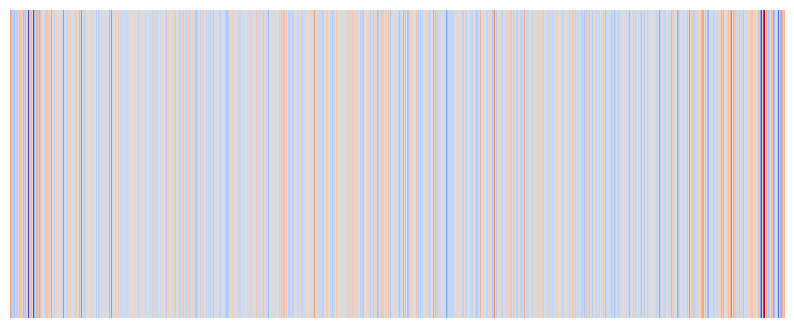

In [34]:
plt.figure(figsize=(10, 4))
ax = sns.heatmap(weights, cmap='coolwarm', cbar=False)
# Eliminar ejes y ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
plt.show()

In [33]:
# APPLY THE MODEL WEIGHTS TO COMPUTE THE PREDICTION
eeg = train_set.eeg.T
preds = mdl.predict(eeg)
preds.shape

(19200, 1)

In [ ]:
# First trial
init = 4800
length = 320
trial_range = range(init, init+length) # trial 2
env_att = att_wav[trial_range,0]
env_unatt = unatt_wav[trial_range,0]
pred_win = preds[trial_range,0]
env_att.shape, att_wav.shape, trial_range, len(env_att)

TypeError: 'int' object is not callable

In [53]:
len(env_att)

TypeError: 'int' object is not callable

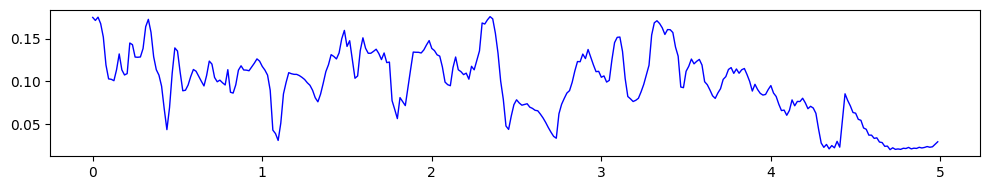

In [54]:
# Representar señales
x = np.arange(0, env_att.shape[0]) / 64

# Primera gráfica
plt.figure(figsize=(10,2))
plt.plot(x, env_att, color='blue', linewidth=1, label='left stim')

# Ajustar espacios entre las gráficas
plt.tight_layout()
plt.show()

In [84]:
def signal_figure(save_path, signal, color):
    # Crear datos de ejemplo
    x = np.arange(0, env_att.shape[0]) / 64

    # Crear la figura
    plt.figure(figsize=(8, 3))
    plt.plot(x, signal, color=color, linewidth=2.5, linestyle='-')

    # Eliminar ejes, ticks y etiquetas
    plt.axis('off')

    # Ajustar márgenes para que la señal no toque los bordes
    plt.margins(x=0, y=0.1)

    # Ajustar layout y GUARDAR antes de mostrar
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)  # Guardar sin fondo

    # Ahora mostrar la figura
    plt.show()

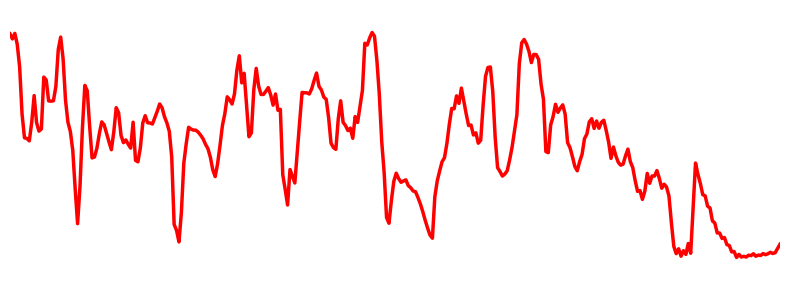

In [85]:
# Señal atendida
filename = 'Ridge_att.png'
signal = env_att
color = 'red'
save_path = os.path.join(os.path.dirname(global_path), 'AAD', 'euronoise_figures', filename)

signal_figure(save_path=save_path, signal=signal, color=color)

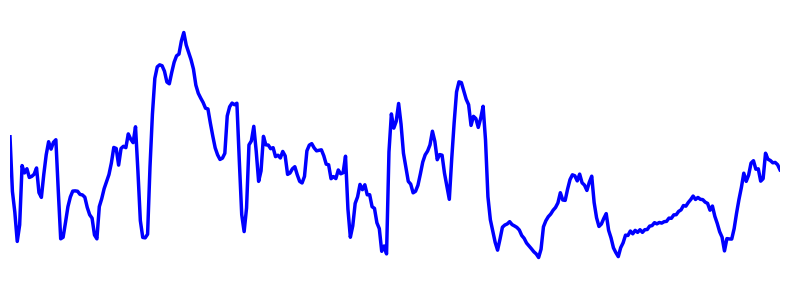

In [86]:
# Señal ignorada
filename = 'Ridge_unatt.png'
signal = env_unatt
color = 'blue'
save_path = os.path.join(os.path.dirname(global_path), 'AAD', 'euronoise_figures', filename)

signal_figure(save_path=save_path, signal=signal, color=color)

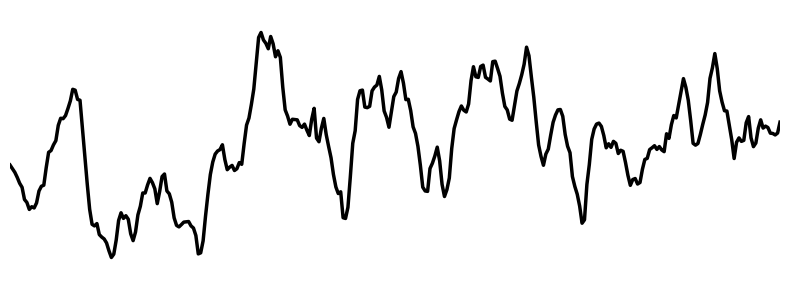

In [88]:
# Predicción
filename = 'Ridge_pred.png'
signal = pred_win
color = 'black'
save_path = os.path.join(os.path.dirname(global_path), 'AAD', 'euronoise_figures', filename)

signal_figure(save_path=save_path, signal=signal, color=color)

In [76]:
filename = 'Ridge_preds.png'
save_path = os.path.join(os.path.dirname(global_path), 'AAD', 'euronoise_figures',filename)
plt.savefig(save_path, transparent=True)

<Figure size 640x480 with 0 Axes>

### Histograms for linear models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [7]:
global_path

'C:/Users/jaulab/Desktop/deepAAD_project'

#### Ridge regression

In [8]:
# Obtain the Ridge model name
model_paths = os.path.join(global_path, 'results', 'euroacustics', 'subj_specific', 'models', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'Ridge_scikit' in model and 'trial' not in model:
        mdl_name = model
        break
mdl_name

'Ridge_scikit_start=-26_end=0'

In [9]:
# Check for the paths and add the alphas to a list
alphas = []
model_path = os.path.join(model_paths, mdl_name)
for subj in os.listdir(model_path):
    subj_path = os.path.join(model_path, subj)
    for mdl in os.listdir(subj_path):
        if 'cvFold' in mdl:
            alpha_info = mdl.split('_')[3]
            alpha = alpha_info.split('=')[1]
            alphas.append(float(alpha))

In [10]:
alphas[-10:], len(alphas)

([1000000.0,
  10000.0,
  100000.0,
  10000000.0,
  10000.0,
  10000.0,
  100000.0,
  10000.0,
  1e-07,
  1e-07],
 90)

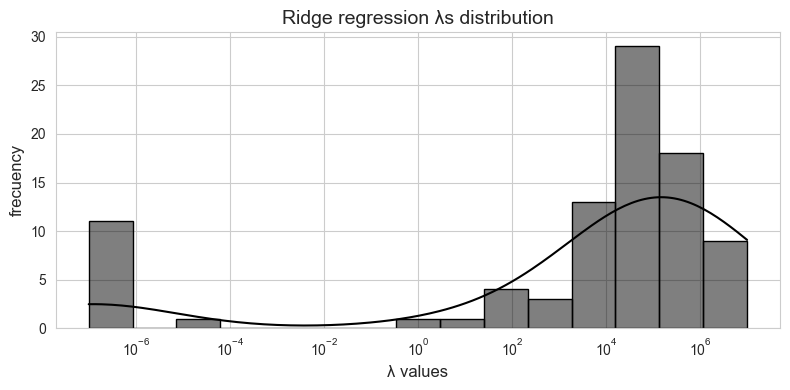

In [ ]:
# Generar la gráfica

# Configurar el estilo de la figura
sns.set_style("whitegrid")

# Crear la figura
plt.figure(figsize=(8, 4))

# Histograma con escala logarítmica en el eje x
sns.histplot(alphas, bins=15, kde=True, log_scale=True, color='black', edgecolor='black')

# Etiquetas y título
plt.xlabel("λ values", fontsize=12)
plt.ylabel("frecuency", fontsize=12)
plt.title("Ridge regression λs distribution", fontsize=14)

# Ajustar diseño y guardar sin fondo para el artículo
plt.tight_layout()
plt.savefig("log_distribution.png", dpi=300, bbox_inches='tight', transparent=True)

# Mostrar la figura
plt.show()

In [ ]:
# Comprobación de que el valor del nombre del archivo encaja con el valor del modelo
path = r'C:\Users\jaulab\Desktop\deepAAD_project\results\euroacustics\subj_specific\models\fulsang_data\Ridge_scikit_start=-26_end=0\S1\Ridge_scikit_cvFold=0_alpha=1.00e+05_acc=0.107'

In [22]:
mdl = pickle.load(open(path, 'rb'))

In [23]:
mdl.best_alpha

100000.0

In [24]:
mdl.best_mdl

Ridge(alpha=100000.0)

#### CCA

In [28]:
# Cargar los paths para CCA
model_paths = os.path.join(global_path, 'results', 'euroacustics', 'subj_specific', 'models', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'CCA' in model and 'comp=16' in model:
        mdl_name = model
        break
mdl_name

'CCA_enc=80_dec=16_comp=16_max_iter=100'

In [29]:
# Check for the paths and add the alphas to a list
comp_list = []
model_path = os.path.join(model_paths, mdl_name)
for subj in os.listdir(model_path):
    subj_path = os.path.join(model_path, subj)
    for mdl in os.listdir(subj_path):
        if 'cvFold' in mdl:
            comp_info = mdl.split('_')[-1]
            n_comp = comp_info.split('=')[1]
            comp_list.append(int(n_comp))

In [30]:
comp_list[-10:], len(comp_list)

([6, 7, 3, 2, 4, 4, 1, 3, 5, 3], 90)

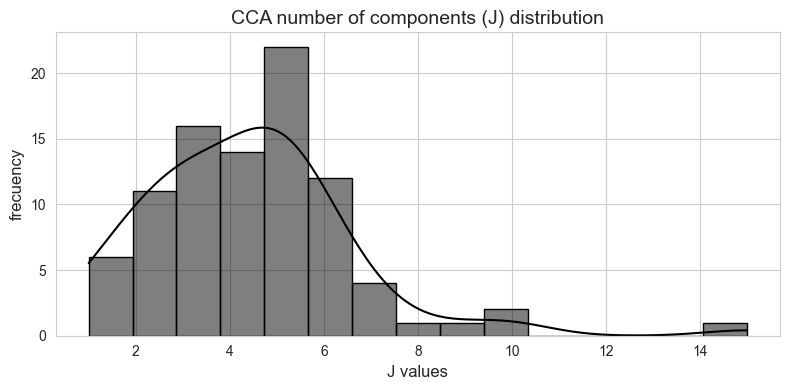

In [33]:
# Generar la gráfica

# Configurar el estilo de la figura
sns.set_style("whitegrid")

# Crear la figura
plt.figure(figsize=(8, 4))

# Histograma con escala logarítmica en el eje x
sns.histplot(comp_list, bins=15, kde=True, color='black', edgecolor='black')

# Etiquetas y título
plt.xlabel("J values", fontsize=12)
plt.ylabel("frecuency", fontsize=12)
plt.title("CCA number of components (J) distribution", fontsize=14)

# Ajustar diseño y guardar sin fondo para el artículo
plt.tight_layout()
plt.savefig("log_distribution.png", dpi=300, bbox_inches='tight', transparent=True)

# Mostrar la figura
plt.show()

### Figuras comparación subj_specific vs finetuned

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

In [75]:
# Cargar los paths para CNN
key = 'population'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'broad' not in model and 'narrow' not in model:
        mdl_name = model
        break
mdl_name

'CNN_batch=128_block=50_lr=2e-05_dr=0.2_shuffle'

In [76]:
# Check an example
path = r'C:\Users\jaulab\Desktop\deepAAD_project\results\euroacustics\population\decode_accuracy\fulsang_data\CNN_batch=128_block=50_lr=2e-05_dr=0.2_post_stim=broad_shuffle\global_validation\mesd'
# with open(path, 'r') as archivo:
#     print(archivo)
acc = json.load(open(path, 'rb'))
acc

{'mesd': [72.07349765816771,
  27.092932970358227,
  40.7057466167029,
  23.85722195943219,
  25.436930196257816,
  68.25443349075941,
  5.4667954182922065,
  17.238384025908392,
  49.32056560206084,
  46.5778194903409,
  21.12206423795863,
  25.86136252842636,
  23.561518630517195,
  8.598496378043102,
  8.42311393232031,
  30.171882578454547,
  32.56539513094949,
  57.176845815165834],
 'N_mesd': [21, 7, 5, 5, 10, 7, 5, 10, 13, 5, 10, 5, 7, 7, 7, 7, 10, 13],
 'tau_mesd': [1.0,
  3.011011011011011,
  7.817817817817818,
  4.58058058058058,
  1.4414414414414414,
  7.5825825825825826,
  1.049049049049049,
  1.0,
  1.6866866866866865,
  8.945945945945946,
  1.1961961961961962,
  4.963963963963964,
  2.618618618618618,
  1.0,
  1.0,
  3.354354354354354,
  1.840840840840841,
  1.980980980980981],
 'p_mesd': [0.55,
  0.6224669113558002,
  0.6824157490824158,
  0.6822911800689578,
  0.5947147147147147,
  0.6223473473473472,
  0.6820620620620619,
  0.6,
  0.5766232899566234,
  0.68243243243243

In [ ]:
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
accuracies = {'1s':[],'2s':[],'5s':[],'10s':[],'25s':[],'50s':[]}
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd != 'mesd':
            # Get the 
            wnd_path = os.path.join(fold_path, wnd)
            acc = json.load(open(wnd_path, 'rb'))
            # Extract the window idx 1s,10s...
            idx = wnd.split('_')[0]
            # Append the results to the corresponding idx
            accuracies[idx].extend(acc)
accuracies['1s'][:10]

[59.0,
 56.833333333333336,
 55.50000000000001,
 58.5,
 56.666666666666664,
 54.333333333333336,
 64.66666666666666,
 63.0,
 53.666666666666664,
 55.166666666666664]

In [79]:
# Change the dictionary keys to represent the performance curve
accuracies = {int(key[:-1]): value for key, value in accuracies.items()}

In [80]:
accuracies.keys()

dict_keys([1, 2, 5, 10, 25, 50])

In [81]:
# Extraer claves y valores para la representación de la curva de rendimiento
x_values = np.array(list(accuracies.keys()))  # Ventanas temporales
means = np.array([np.mean(v) for v in accuracies.values()])  # Medias
stds = np.array([np.std(v) for v in accuracies.values()])  # Desviaciones estándar

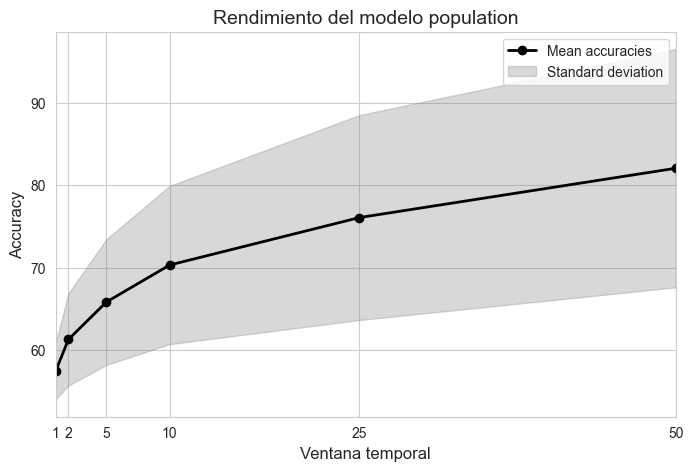

In [82]:
# Seleccionar el estilo
sns.set_style('whitegrid')

# Crear una figura
plt.figure(figsize=(8,5))

# Graficar la media con una línea sólida
plt.plot(x_values, means, marker='o', linestyle='-', color='black', linewidth=2, label='Mean accuracies')

# Agregar el área sombreada de la desviación estándar
plt.fill_between(x_values, means - stds, means + stds, color='gray', alpha=0.3, label='Standard deviation')

# Ajustes de ejes
plt.xticks(x_values, x_values)  # Asegurar que se muestren todos los valores en x
plt.xlabel("Ventana temporal", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xlim([1, 50])

# Título y leyenda
plt.title("Rendimiento del modelo population", fontsize=14)
plt.legend()

# Mostrar la gráfica
plt.show()

In [90]:
# Cargar datos para modelos subj-specific (SS)
key = 'subj_specific'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'broad' not in model and 'narrow' not in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
ss_accuracies = {'1s':[],'2s':[],'5s':[],'10s':[],'25s':[],'50s':[]}
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd != 'mesd':
            # Get the 
            wnd_path = os.path.join(fold_path, wnd)
            acc = json.load(open(wnd_path, 'rb'))
            # Extract the window idx 1s,10s...
            idx = wnd.split('_')[0]
            # Append the results to the corresponding idx
            ss_accuracies[idx].extend(acc)
ss_accuracies['10s'][:10]

[60.0,
 78.33333333333333,
 80.0,
 80.0,
 78.33333333333333,
 60.0,
 88.33333333333333,
 83.33333333333334,
 81.66666666666667,
 75.0]

In [91]:
# Cargar datos para modelos subj-finetuned (SF)
key = 'population'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_finetuned_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'broad' not in model and 'narrow' not in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
sf_accuracies = {'1s':[],'2s':[],'5s':[],'10s':[],'25s':[],'50s':[]}
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd != 'mesd':
            # Get the path
            wnd_path = os.path.join(fold_path, wnd)
            acc = json.load(open(wnd_path, 'rb'))
            # Extract the window idx 1s,10s...
            idx = wnd.split('_')[0]
            # Append the results to the corresponding idx
            sf_accuracies[idx].extend(acc)
sf_accuracies['10s'][:10]

[75.0,
 78.33333333333333,
 70.0,
 70.0,
 70.0,
 56.666666666666664,
 96.66666666666667,
 83.33333333333334,
 68.33333333333333,
 70.0]

In [92]:
# Change the dictionary keys to represent the performance curve
ss_accuracies = {int(key[:-1]): value for key, value in ss_accuracies.items()}
sf_accuracies = {int(key[:-1]): value for key, value in sf_accuracies.items()}

In [ ]:
# Diccionarios en un conjunto
datasets = {
    "Population": accuracies,
    "Subject-specific": ss_accuracies,
    "Subject-finetuned": sf_accuracies
}

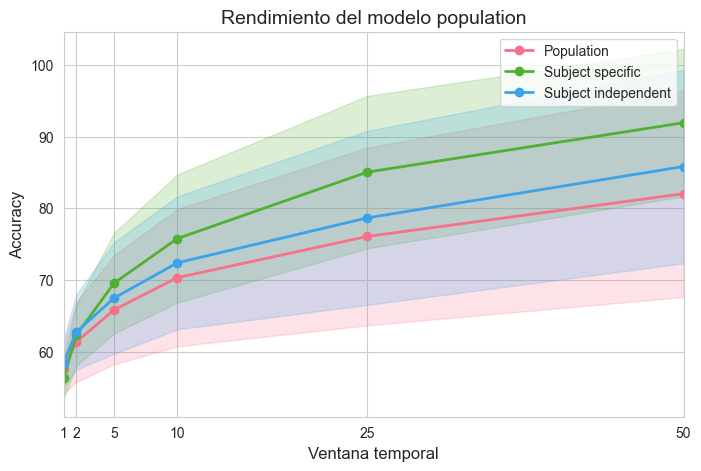

In [ ]:
# Estilo de la figura
sns.set_style("whitegrid")
palette = sns.color_palette("husl", len(datasets))  # Colores científicos

# Crear la figura
plt.figure(figsize=(8, 5))

# Iterar sobre los datasets y graficarlos
for (label, data), color in zip(datasets.items(), palette):
    x_values = np.array(list(data.keys()))
    means = np.array([np.mean(v) for v in data.values()])
    stds = np.array([np.std(v) for v in data.values()])

    # Graficar la media con una línea sólida
    plt.plot(x_values, means, marker='o', linestyle='-', color=color, linewidth=2, label=label)

    # Agregar el área sombreada de la desviación estándar
    plt.fill_between(x_values, means - stds, means + stds, color=color, alpha=0.2)

# Ajustes de ejes
plt.xticks(x_values, x_values)  # Asegurar que se muestren todos los valores en x
plt.xlabel("Ventana temporal", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xlim([1, 50])

# Título y leyenda
plt.title("Rendimiento del modelo CNN", fontsize=14)
plt.legend()